In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
box=df.iloc[:,[1,2,3,4]]

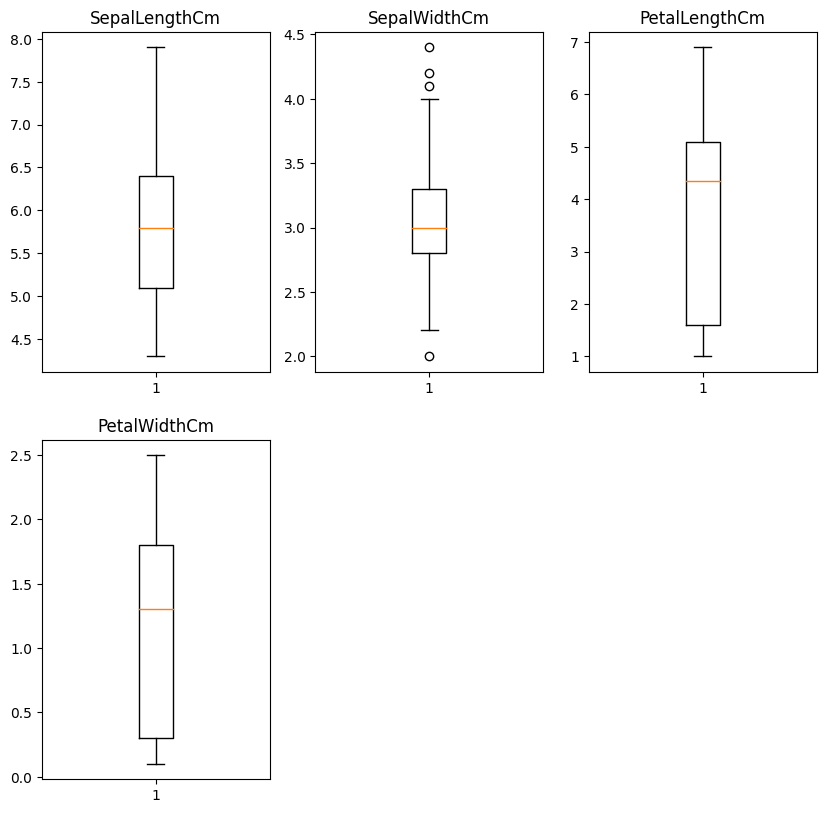

In [13]:
plt.figure(figsize=(10,15))
p=1
for i in box:
    plt.subplot(3,3,p)
    plt.boxplot(df[i])
    plt.title(i)
    p+=1
plt.show()


In [14]:
Q1=np.percentile(df['SepalWidthCm'],25)
Q3=np.percentile(df['SepalWidthCm'],75)


In [16]:
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
print(LB)
print(UB)

2.05
4.05


In [18]:
df.loc[(df['SepalWidthCm']<2.05)|(df['SepalWidthCm']>4.05)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [19]:
np.mean(df['SepalWidthCm'])

3.0540000000000003

In [20]:
np.median(df['SepalWidthCm'])

3.0

In [21]:
df.loc[(df['SepalWidthCm']<2.05)|(df['SepalWidthCm']>4.05),'SepalWidthCm']=np.mean(df['SepalWidthCm'])

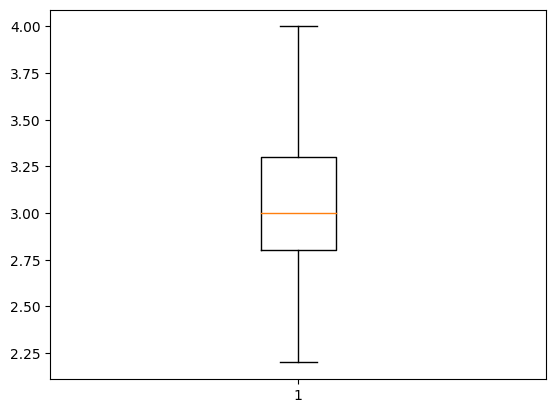

In [22]:
plt.boxplot(df['SepalWidthCm'])
plt.show()

In [38]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

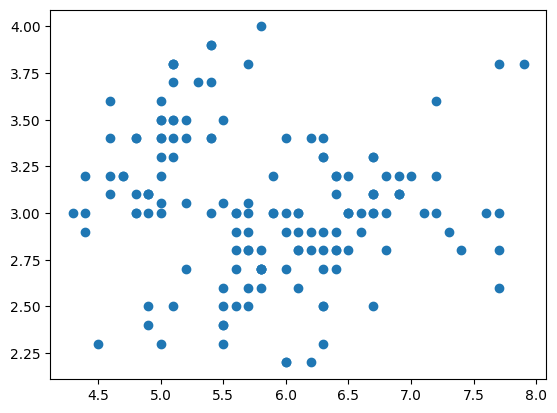

In [27]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

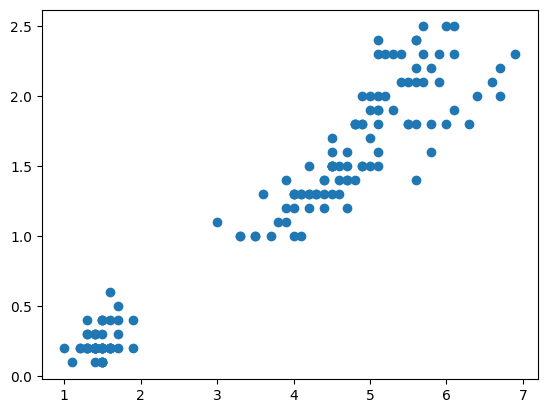

In [28]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.show()

In [33]:
from sklearn.cluster import KMeans

In [39]:
sse=[]
rng=range(1,11)
for k in rng:
    km=KMeans(n_clusters=k,max_iter=1000)
    km.fit(X)
    sse.append(km.inertia_)


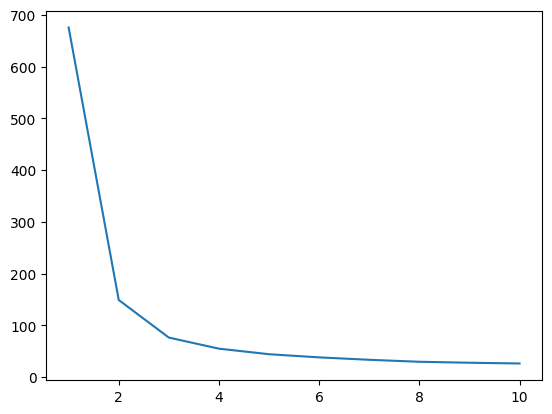

In [40]:
plt.plot(rng,sse)

In [48]:
km=KMeans(n_clusters=3,max_iter=1000,random_state=1)
predict=km.fit_predict(X)

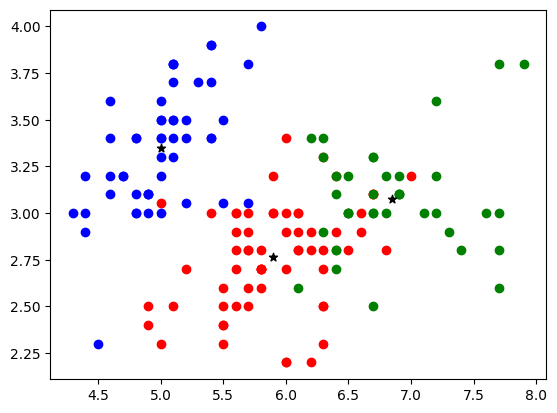

In [49]:
plt.scatter(X[predict==0,0],X[predict==0,1],color='red')
plt.scatter(X[predict==1,0],X[predict==1,1],color='blue')
plt.scatter(X[predict==2,0],X[predict==2,1],color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',)
plt.show()